In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data/przykladowe_dane_cena_mieszkan.csv')

In [3]:
X = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values

In [4]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [5]:
y_pred = model.predict(X)

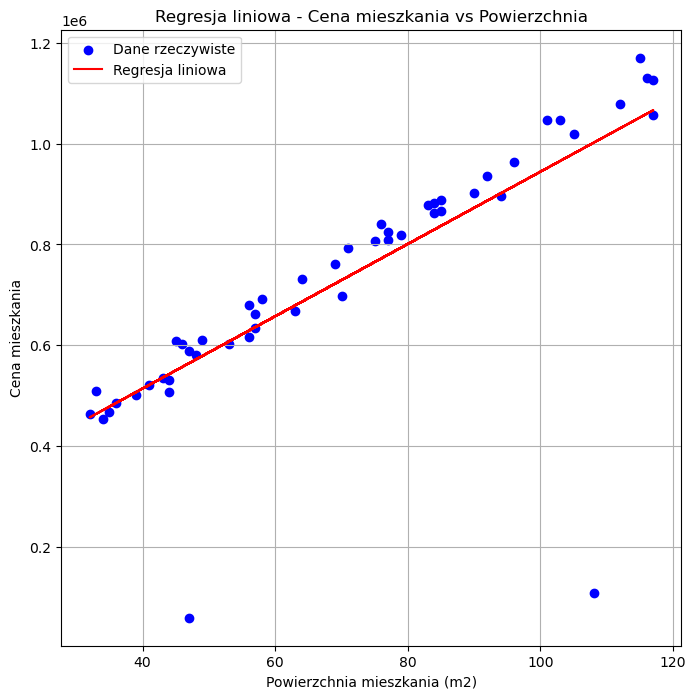

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(X, y, color='blue', label='Dane rzeczywiste')
plt.plot(X, y_pred, color='red', label='Regresja liniowa')
plt.xlabel('Powierzchnia mieszkania (m2)')
plt.ylabel('Cena mieszkania')
plt.title('Regresja liniowa - Cena mieszkania vs Powierzchnia')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
r2 = r2_score(y, y_pred)
print(f'Współczynnik R^2: {r2:.4f}')

Współczynnik R^2: 0.5988


In [8]:
print("Współczynnik kierunkowy (a):", model.coef_[0])
print("Wyraz wolny (b):", model.intercept_)

Współczynnik kierunkowy (a): 7164.892633968335
Wyraz wolny (b): 227771.6928007817


In [9]:
residuals = y - y_pred
std_res = np.std(residuals)

In [10]:
filter = np.abs(residuals) <= 3 * std_res

In [11]:
X_filtered = X[filter]
y_filtered = y[filter]

In [12]:
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)2

LinearRegression()

In [13]:
y_filtered_pred = model_filtered.predict(X_filtered)

In [14]:
r2_filtered = r2_score(y_filtered, y_filtered_pred)
print(r2_filtered)

0.9819012364453688


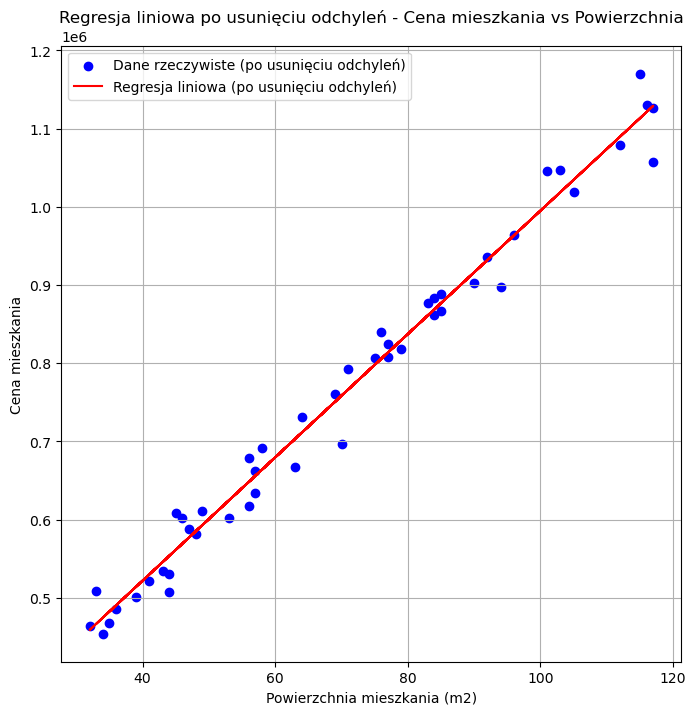

In [15]:
plt.figure(figsize = (8,8))
plt.scatter(X_filtered, y_filtered, color='blue', label='Dane rzeczywiste (po usunięciu odchyleń)')
plt.plot(X_filtered, y_filtered_pred, color='red', label='Regresja liniowa (po usunięciu odchyleń)')
plt.xlabel('Powierzchnia mieszkania (m2)')
plt.ylabel('Cena mieszkania')
plt.title('Regresja liniowa po usunięciu odchyleń - Cena mieszkania vs Powierzchnia')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print("Współczynnik kierunkowy (a) po usunięciu odchyleń:", model_filtered.coef_[0])
print("Wyraz wolny (b) po usunięciu odchyleń:", model_filtered.intercept_)

Współczynnik kierunkowy (a) po usunięciu odchyleń: 7884.531038435267
Wyraz wolny (b) po usunięciu odchyleń: 206597.09225263644
